# Ejemplo de Sistema Dinamico con Python

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

$$
\quad
\frac{dy}{dx} + y = x, \quad \quad y(0) = 1.
$$

$$
\quad
y = x - 1 + 2e^{-x}
$$

In [13]:
from scipy.integrate import odeint
#odeint?    # Sacar el comentario para ver los posibles parametros de la funcion odeint

# Definimos una funcion que representa la derivada
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

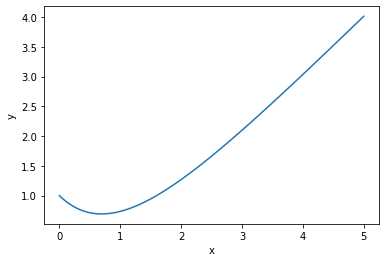

In [14]:
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y");

Comparamos solucion numerica con la solucion analitica en el mismo grafico:

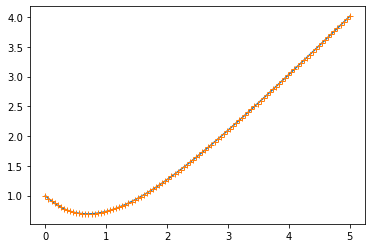

In [15]:
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+");

Veamos la diferencia entre las 2 series:

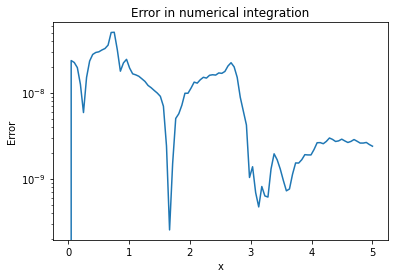

In [16]:
y_diff = np.abs(y_exact - ys)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

Se puede investigar y analizar como cambia usando distintos parametros a la solucion de `odeint`.

## Ecuaciones de Segundo Orden

In [17]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

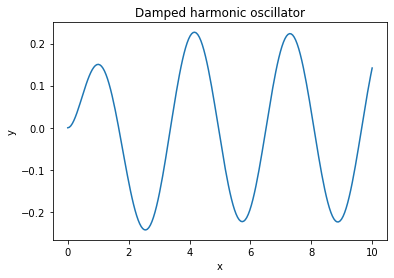

In [18]:
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator");

## Predadores-Presa

In [19]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

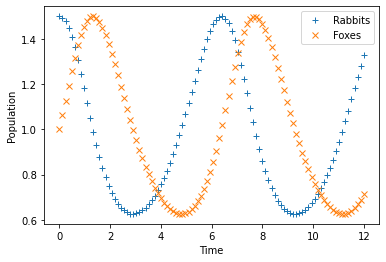

In [20]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

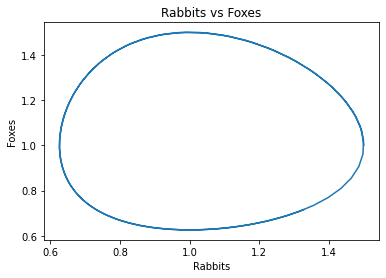

In [21]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

El grafico de arriba muestra que el sistema es periodico.

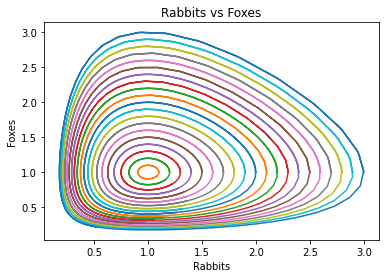

In [22]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");